# **Applied Machine Learning - Basic**
Machine learning analysis of the Iris dataset. We aim to build a model able to solve a multiclassification problem, with an accuracy between 95-97%. 

In [1]:
#Importing libraries necessary for the entire analysis
from scipy.stats import uniform
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.feature_selection as fs
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.preprocessing as pp

### 1. Dataset loading
The dataset is retrieved from the web page https://archive.ics.uci.edu/ml/datasets/iris. In the same page, the dataset's general information are described. 



In [2]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris_df = pd.read_csv(data_url, names = col_names)
iris_df.head() #displaying just the first 5 rows (by default) of the dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Data descriptive statistics
Reported here is a general statistical description of the dataset. Plots may be displayed as visual support for the same descriptive claim. 

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [5]:
iris_df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
iris_df.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

This datasets consists in 150 examples, each described by 4 numeric and predictive attributes and 1 categorical one. 
All numerical attributes are reported in *cm*; the categorical attribute (or class) can assume three possible Iris specie, respectively *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each specie has 50 examples, meaning that the class distribution is 33.3% for each of the 3 possible classes. \\
No missing attribute values are present in the dataset. 

In [7]:
pd.set_option('precision',3) #approximation by the first 3 decimals 
print(iris_df.describe()) #returns a statistical description of all 4 numerical attributes

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean          5.843        3.054         3.759        1.199
std           0.828        0.434         1.764        0.763
min           4.300        2.000         1.000        0.100
25%           5.100        2.800         1.600        0.300
50%           5.800        3.000         4.350        1.300
75%           6.400        3.300         5.100        1.800
max           7.900        4.400         6.900        2.500


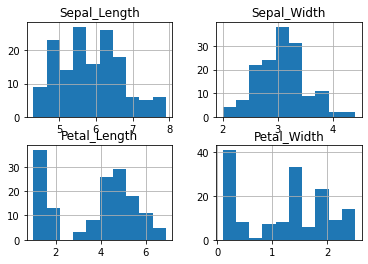

In [8]:
#histogram plots
iris_df.hist()
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

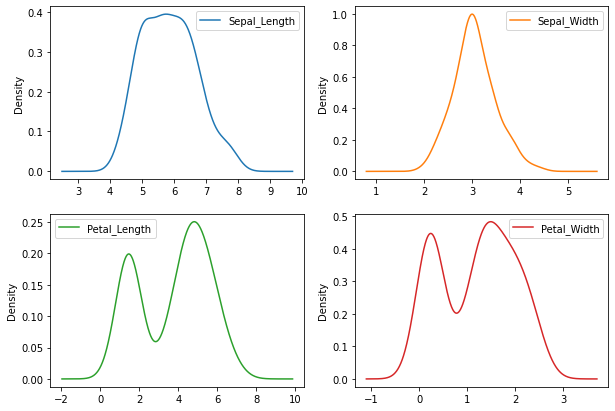

In [9]:
#density plots

iris_df.plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(10, 7))
plt.show() 

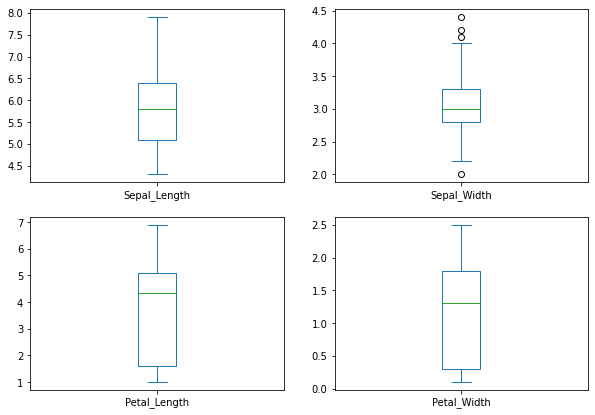

In [10]:
#box and whisker plots
iris_df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10, 7))
plt.show()

A general statistic report of the entire dataset is provided, which claims are supported by graphical univariate plots.

In [11]:
#same general description wrt species (for space convenience divided by attributes)
print(iris_df.groupby('Species')['Sepal_Length'].describe())
print()
print(iris_df.groupby('Species')['Sepal_Width'].describe())
print()
print(iris_df.groupby('Species')['Petal_Length'].describe())
print()
print(iris_df.groupby('Species')['Petal_Width'].describe())

                 count   mean    std  min    25%  50%  75%  max
Species                                                        
Iris-setosa       50.0  5.006  0.352  4.3  4.800  5.0  5.2  5.8
Iris-versicolor   50.0  5.936  0.516  4.9  5.600  5.9  6.3  7.0
Iris-virginica    50.0  6.588  0.636  4.9  6.225  6.5  6.9  7.9

                 count   mean    std  min    25%  50%    75%  max
Species                                                          
Iris-setosa       50.0  3.418  0.381  2.3  3.125  3.4  3.675  4.4
Iris-versicolor   50.0  2.770  0.314  2.0  2.525  2.8  3.000  3.4
Iris-virginica    50.0  2.974  0.322  2.2  2.800  3.0  3.175  3.8

                 count   mean    std  min  25%   50%    75%  max
Species                                                         
Iris-setosa       50.0  1.464  0.174  1.0  1.4  1.50  1.575  1.9
Iris-versicolor   50.0  4.260  0.470  3.0  4.0  4.35  4.600  5.1
Iris-virginica    50.0  5.552  0.552  4.5  5.1  5.55  5.875  6.9

                 count

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc33cfc8940>,
      dtype=object)

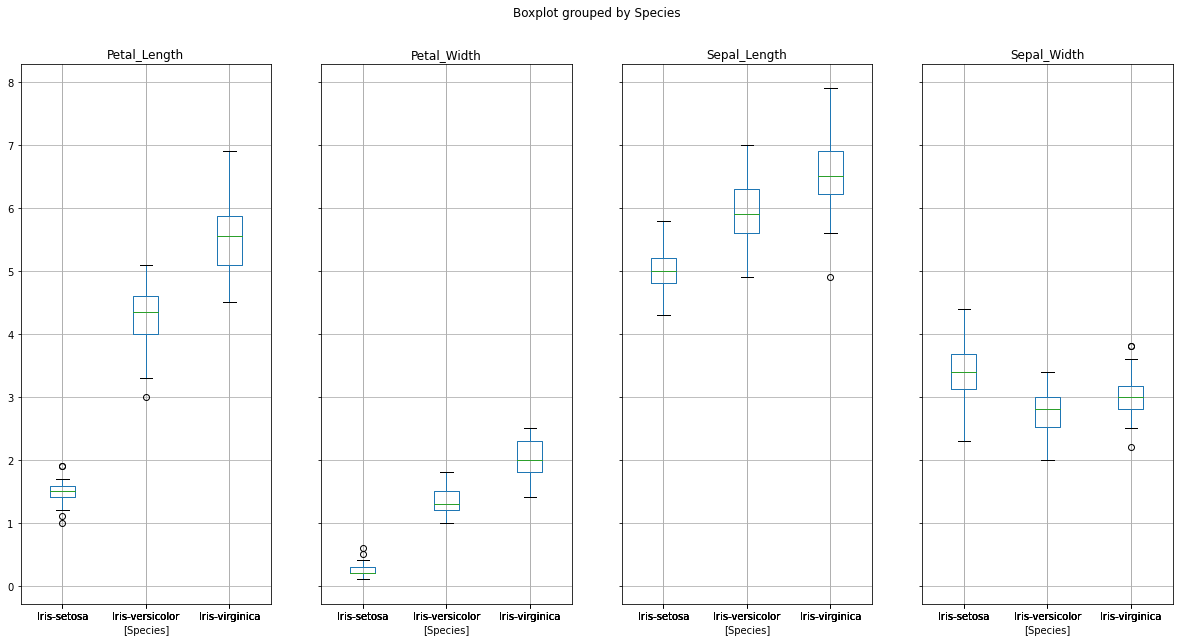

In [12]:
iris_df.boxplot(by='Species', figsize=(20, 10), layout=(1, 4))

By displaying the boxplots for all attributes in all species, outliers can be identified. A first and naive insight about the best features that should be selected in order to optimize the model prediction accuracy can also be inferred. 

### 3. Data graphical visualization
Graphical representations of the data which can highlight hidden relationships between the predictive attributes for each specie. 

In [13]:
iris_df.corr(method='pearson')

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000,-0.109,0.872,0.818
Sepal_Width,-0.109,1.000,-0.421,-0.357
Petal_Length,0.872,-0.421,1.000,0.963
Petal_Width,0.818,-0.357,0.963,1.000


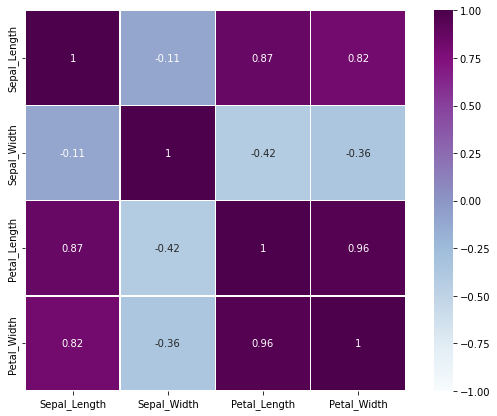

In [14]:
sns.heatmap(iris_df.corr(method='pearson'), square=True, vmin=-1, vmax=1, cmap='BuPu', annot=True, linewidth=.5)

The table above (and related correlation matrix plot) reports the standard linear correlation coefficients between pairs of attributes. Coefficients range between $\small[-1; +1]$, with $\small -1$: perfect negative correlation; $\small 0$: no correlation; $\small +1$: perfect positive correlation. From the table, *Petal_Length* and *Petal_Width* are the most highly correlated, followed by *Petal_Length, Sepal_Length* and *Petal_Width, Sepal_Length*. 

##### 3.1. Bivariate plots
The three highly-positively-correlated attributes are depicted for each specie. A clear separation between *Iris setosa* and the other two species is observed in all these plots, which are also shown in the multivariate scatter plot that follows. 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


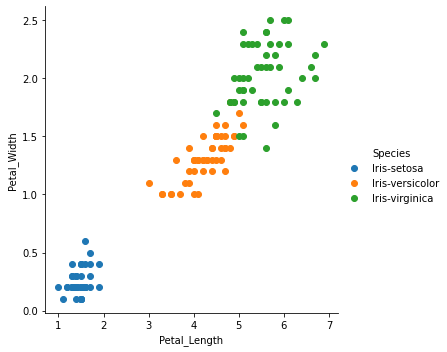

In [15]:
#Petal_Length vs Petal_Width
sns.FacetGrid(iris_df, hue="Species", size=5).map(plt.scatter,"Petal_Length","Petal_Width").add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


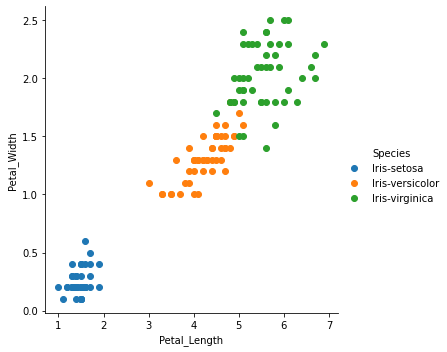

In [16]:
#Petal_Length vs Sepal_Length
sns.FacetGrid(iris_df, hue="Species", size=5).map(plt.scatter,"Petal_Length","Petal_Width").add_legend();

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


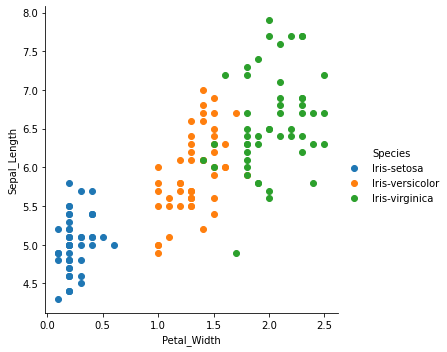

In [17]:
#Petal_Width vs Sepal_Length
sns.FacetGrid(iris_df, hue="Species", size=5).map(plt.scatter,"Petal_Width","Sepal_Length").add_legend();

##### 3.2. Multivariate plots
The aim is to visualize the correlation between all attributes combinations, regardless their correlation coefficient value. Along the plot diagonal, species density plots for each attribute are displayed; in the upper triangle of the plot, bivariate scatter plots are represented; the lower triangle highligths the attributes bivariate distributions based on the kernel density estimation (kde), in all species. 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


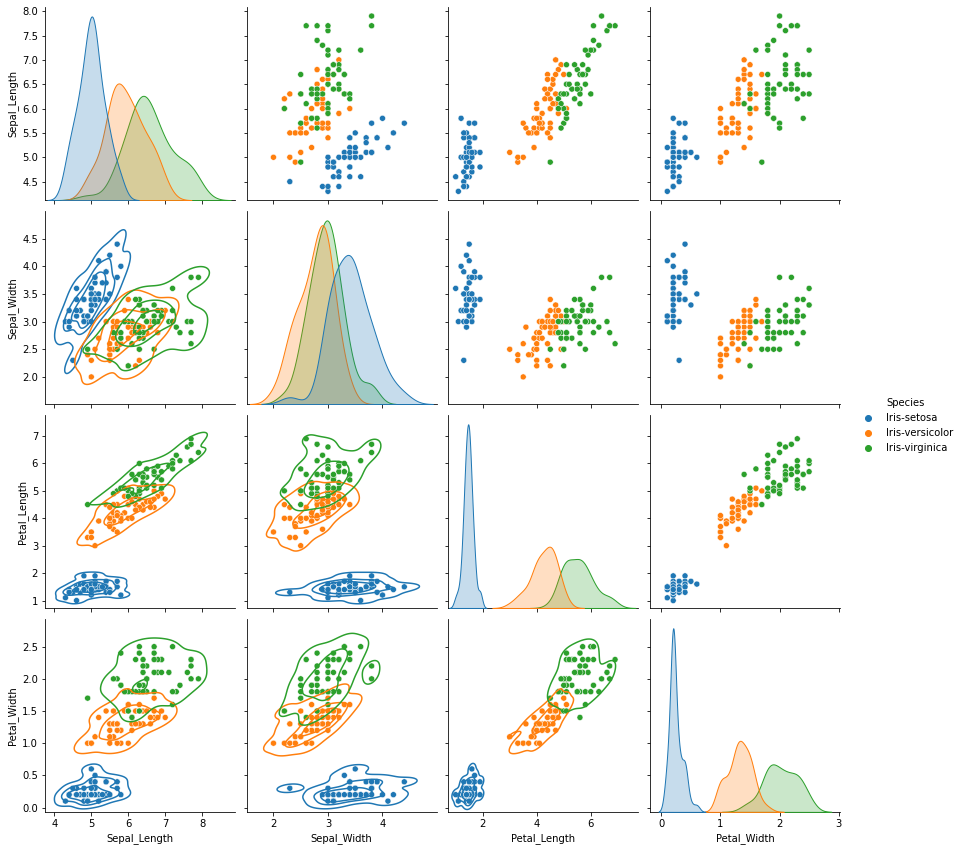

In [18]:
sns.pairplot(iris_df,hue="Species",size=3, diag_kind='kde').map_lower(sns.kdeplot, levels=4, color=".2")

### 4. Pre-processing of the data
Data manipulation steps conducted in order to ensure/enhance the predictive model performance. The aim is to convert in the same scale each attribute values.

In [19]:
input_array = iris_df.values #retrieving all values collected in the df

In [20]:
#splitting input_array into a features array (x_array) and a target one (y_array)
x_array = input_array[:,0:4]
y_array = input_array[:,4]

In [21]:
#rescaling each feature values by removing the mean and scaling to unit variance
rescaled_x = pp.MinMaxScaler(feature_range=(0,1)).fit_transform(x_array)

In [22]:
#comparison before-after rescaling procedure of the feature array (just displaying the first 4 examples)
np.set_printoptions(precision=3) #approximation by the first three decimals 
print(x_array[0:4,:])
print()
print(rescaled_x[0:4,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]

[[0.222 0.625 0.068 0.042]
 [0.167 0.417 0.068 0.042]
 [0.111 0.5   0.051 0.042]
 [0.083 0.458 0.085 0.042]]


### 5. Feature selection
Selection the most relevant features/reduction of the dimensionality of the dataset to improve the model's prediction accuracy or boost performances on high-dimensional datasets. 
Here, *k=2* features are going to be select to try reaching an accurate multiclassification prediction. \
The *k* best features selected are *Petal_Length* and *Petal_Width*. 

In [23]:
model = lm.LogisticRegression()
rfe = fs.RFE(model, n_features_to_select=2).fit(rescaled_x, y_array) 

print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)
col_names[:-1] #feature names (minus the class col)

Num Features: 2
Selected Features: [False False  True  True]
Feature Ranking: [3 2 1 1]


['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

### 6. Dataset splitting and model evaluation
The dataset is split into training and testing sets, following the *k*-fold cross validation procedure, with *k*=3. 

In [24]:
#dividing the training subset into k=5 folds
k_fold = ms.KFold(n_splits=3, random_state=7, shuffle=True)

In [25]:
#obtaining the indexes of the training and testing subsets
for train_idx, test_idx in k_fold.split(rescaled_x):
  x_train, x_test = rescaled_x[train_idx][:, 2:], rescaled_x[test_idx][:, 2:]
  y_train, y_test = y_array[train_idx], y_array[test_idx]

In [26]:
#building the classifier
clf = lm.LogisticRegression().fit(x_train, y_train)

In [27]:
#obtaining the model accuracy
k_fold_scores = ms.cross_val_score(clf, rescaled_x[:, 2:], y_array, cv=k_fold, scoring='accuracy')
print('Model accuracy: %.3f' %k_fold_scores.mean())
print('Accuracy std: %.3f '%k_fold_scores.std())

Model accuracy: 0.960
Accuracy std: 0.016 


The model correctly predicts Iris species with a 0.96±0.016 accuracy.

In [28]:
#testing the model 
np.set_printoptions(precision=3)
y_pred = clf.predict(x_test)
prob_y = clf.predict_proba(x_test)

### 7. Model performance assessment through metrics
Evaluation of the model performance through the classic machine learning scoring indexes. 

##### 7.1. ROC curve
A false positive rate-true positive rate function. *Iris-setosa* is always correctly predicted, as testified by its AUC equal to 1. 

In [29]:
#binarizing the target classes
label_binarizer = pp.LabelBinarizer().fit(y_train)

In [30]:
#checking the encoding of each class
print(label_binarizer.transform(['Iris-setosa']))
print(label_binarizer.transform(['Iris-versicolor']))
print(label_binarizer.transform(['Iris-virginica']))

[[1 0 0]]
[[0 1 0]]
[[0 0 1]]


In [31]:
#assigning the binarizer to a variable for 'coding convenience'
y_onehot_test = label_binarizer.transform(y_test)

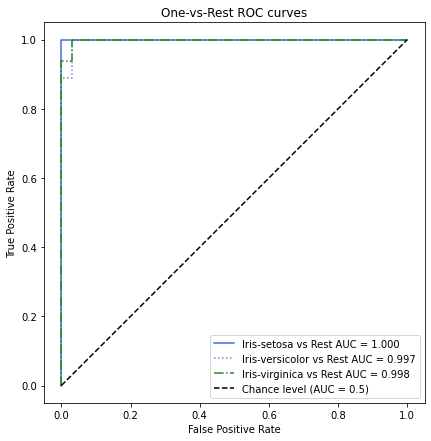

In [32]:
#building the roc curve 
fpr, tpr, thr, auc_score = {}, {}, {}, {}
colors = ['royalblue', 'mediumpurple', 'forestgreen']
style = ['-', ':', '-.']
for specie in iris_df['Species'].unique():
  id = np.flatnonzero(label_binarizer.classes_ == specie)[0]
  fpr[id], tpr[id], thr[id] = roc_curve(y_onehot_test[:, id], prob_y[:, id])
  auc_score[id] = auc(fpr[id], tpr[id])
  #plotting the multiclass ROC curve
  plt.plot(fpr[id], tpr[id], label='%s vs Rest AUC = %.3f' %(specie, auc_score[id]), linestyle=style[id], color=colors[id])#plotting

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.axis('square')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC curves')
plt.legend()
plt.show()                                               

##### 7.2. Confusion matrix
Qualitative/quantitative assessment of the model prediction ability. On the y-axis, true labels; on the x-axis, predicted labels. 2 examples are incorrectly predicted as *Iris-virginica* while they are truly *I. versicolor*. 

In [33]:
#displaying the confusion matrix
names = ['Setosa', 'Versicolor', 'Virginica']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=names, index=names)
print(cm)

            Setosa  Versicolor  Virginica
Setosa          16           0          0
Versicolor       0          16          2
Virginica        0           0         16


Text(0.5, 1.0, 'Confusion Matrix')

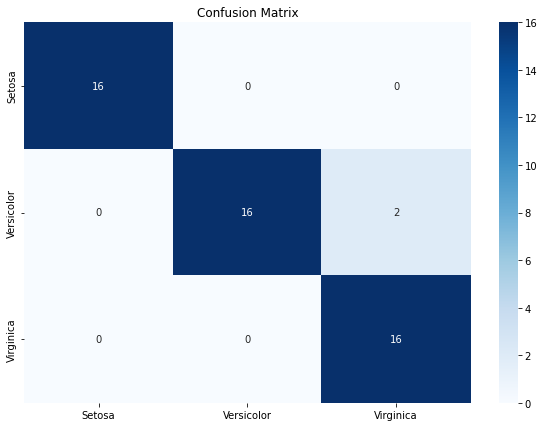

<Figure size 720x504 with 0 Axes>

In [34]:
#plotting the confusion matrix
ax = plt.axes()
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, cmap="Blues", ax=ax, fmt="d", annot_kws={'size':10})
ax.set_title('Confusion Matrix')

##### 7.3. Classification report
A plain report about the model classification ability. The results confirm the ability of the model to always correctly classify *Iris-setosa* from other species. 

In [35]:
report = classification_report(y_test, y_pred, digits=3)          

In [36]:
print(report)    

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        16
Iris-versicolor      1.000     0.889     0.941        18
 Iris-virginica      0.889     1.000     0.941        16

       accuracy                          0.960        50
      macro avg      0.963     0.963     0.961        50
   weighted avg      0.964     0.960     0.960        50



### 8. Modelling comparison
Comparing our model performance with a serie of known machine learning algorithms. Overall, all models accuracy are very similar, with CART (decision tree algorithm) scoring the best. 

In [37]:
#preparing all models to be compared
models = []
models.append(('LR', lm.LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))      

In [38]:
#evaluation of each model
res, names = [], []
for name, model in models:
  cv_res = ms.cross_val_score(model, rescaled_x[:, 2:], y_array, cv=k_fold, scoring='accuracy')
  res.append(cv_res), names.append(name)
  print("%s: %.3f (±%.3f)" % (name, cv_res.mean(), cv_res.std()))

LR: 0.960 (±0.016)
LDA: 0.967 (±0.034)
KNN: 0.967 (±0.034)
CART: 0.973 (±0.025)
NB: 0.960 (±0.033)
SVM: 0.960 (±0.028)


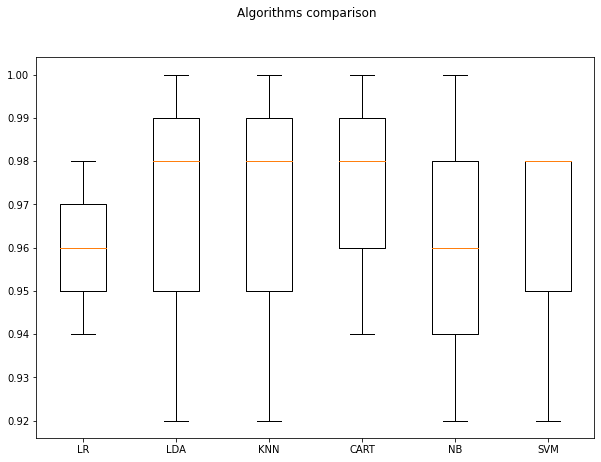

In [39]:
#boxplot visual comparison of models
fig = plt.figure()
fig.suptitle('Algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(names)
plt.show()